# **Projet Séries temporelles - Oumaïma Bounhar - 2IA 2022 - IMT Mines Alès**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
# pour ignorer les warnings
warnings.filterwarnings('ignore')

# **Question 1**

## **Préparation des données**

In [ ]:
df = pd.read_excel('dpae-mensuelles-france-entiere.xlsx')
CDD = df[df["Nature de contrat"] == "CDD de plus d'un mois"]
CDI = df[df["Nature de contrat"] == "CDI"]

In [ ]:
columns_names = ['Année', 'Trimestre', 'Dernier jour du mois', 'Durée de contrat', 'Nature de contrat', 'DPAE (brut)', 'DPAE (cvs)']
CDD.columns = columns_names
CDI.columns = columns_names

In [ ]:
CDI.head()

,Année,Trimestre,Dernier jour du mois,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
2,2000,2,2000-04-30,Contrat de plus d'un mois,CDI,274633,282960
3,2000,2,2000-05-31,Contrat de plus d'un mois,CDI,256064,283773
4,2000,2,2000-06-30,Contrat de plus d'un mois,CDI,248450,280461
5,2000,3,2000-07-31,Contrat de plus d'un mois,CDI,244460,282616
6,2000,4,2000-11-30,Contrat de plus d'un mois,CDI,298927,297091


In [ ]:
CDD.head()

,Année,Trimestre,Dernier jour du mois,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
0,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222287,321417
1,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267406,324373
7,2000,4,2000-12-31,Contrat de plus d'un mois,CDD de plus d'un mois,203868,315242
8,2001,1,2001-02-28,Contrat de plus d'un mois,CDD de plus d'un mois,206800,318447
9,2001,1,2001-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,247699,307696


In [ ]:
print(CDD.dtypes)
print('---------')
print(CDI.dtypes)

Année                    int64
Trimestre                int64
Dernier jour du mois    object
Durée de contrat        object
Nature de contrat       object
DPAE (brut)              int64
DPAE (cvs)               int64
dtype: object
---------
Année                    int64
Trimestre                int64
Dernier jour du mois    object
Durée de contrat        object
Nature de contrat       object
DPAE (brut)              int64
DPAE (cvs)               int64
dtype: object


In [ ]:
print(type(CDD['Dernier jour du mois'][0]))

<class 'str'>


In [ ]:
# on transforme la variable 'Dernier jour du mois' de str vers datetime
CDD['Dernier jour du mois'] = pd.to_datetime(CDD['Dernier jour du mois'], format='%Y/%m/%d')
CDI['Dernier jour du mois'] = pd.to_datetime(CDI['Dernier jour du mois'], format='%Y/%m/%d')

In [ ]:
CDD['Dernier jour du mois']

0     2000-02-29
1     2000-03-31
7     2000-12-31
8     2001-02-28
9     2001-03-31
         ...    
547   2022-06-30
548   2022-08-31
550   2022-10-31
552   2023-01-31
554   2023-02-28
Name: Dernier jour du mois, Length: 278, dtype: datetime64[ns]

In [ ]:
CDI['Dernier jour du mois']

2     2000-04-30
3     2000-05-31
4     2000-06-30
5     2000-07-31
6     2000-11-30
         ...    
545   2022-01-31
549   2022-09-30
551   2022-11-30
553   2023-01-31
555   2023-02-28
Name: Dernier jour du mois, Length: 278, dtype: datetime64[ns]

In [ ]:
CDD.head()

,Année,Trimestre,Dernier jour du mois,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
0,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222287,321417
1,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267406,324373
7,2000,4,2000-12-31,Contrat de plus d'un mois,CDD de plus d'un mois,203868,315242
8,2001,1,2001-02-28,Contrat de plus d'un mois,CDD de plus d'un mois,206800,318447
9,2001,1,2001-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,247699,307696


In [ ]:
CDI.head()

,Année,Trimestre,Dernier jour du mois,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
2,2000,2,2000-04-30,Contrat de plus d'un mois,CDI,274633,282960
3,2000,2,2000-05-31,Contrat de plus d'un mois,CDI,256064,283773
4,2000,2,2000-06-30,Contrat de plus d'un mois,CDI,248450,280461
5,2000,3,2000-07-31,Contrat de plus d'un mois,CDI,244460,282616
6,2000,4,2000-11-30,Contrat de plus d'un mois,CDI,298927,297091


## **CDD**

### Série temporelle

In [ ]:
df_cdd_mois_annee_dpae = CDD[['Année', 'DPAE (brut)', 'Dernier jour du mois']]

In [ ]:
df_cdd_mois_annee_dpae

,Année,DPAE (brut),Dernier jour du mois
0,2000,222287,2000-02-29
1,2000,267406,2000-03-31
7,2000,203868,2000-12-31
8,2001,206800,2001-02-28
9,2001,247699,2001-03-31
...,...,...,...
547,2022,451693,2022-06-30
548,2022,335646,2022-08-31
550,2022,382254,2022-10-31
552,2023,366756,2023-01-31


In [ ]:
# on aggrége les données en les groupant par mois puis en faisant la somme du DPAE
cdd_agg_per_month_each_year = df_cdd_mois_annee_dpae.groupby('Dernier jour du mois', as_index=False).agg('sum')

In [ ]:
cdd_agg_per_month_each_year

,Dernier jour du mois,Année,DPAE (brut)
0,2000-01-31,2000,277127
1,2000-02-29,2000,222287
2,2000-03-31,2000,267406
3,2000-04-30,2000,275935
4,2000-05-31,2000,296683
...,...,...,...
273,2022-10-31,2022,382254
274,2022-11-30,2022,325989
275,2022-12-31,2022,249709
276,2023-01-31,2023,366756


In [ ]:
plt.rcParams["figure.figsize"] = (15,5)

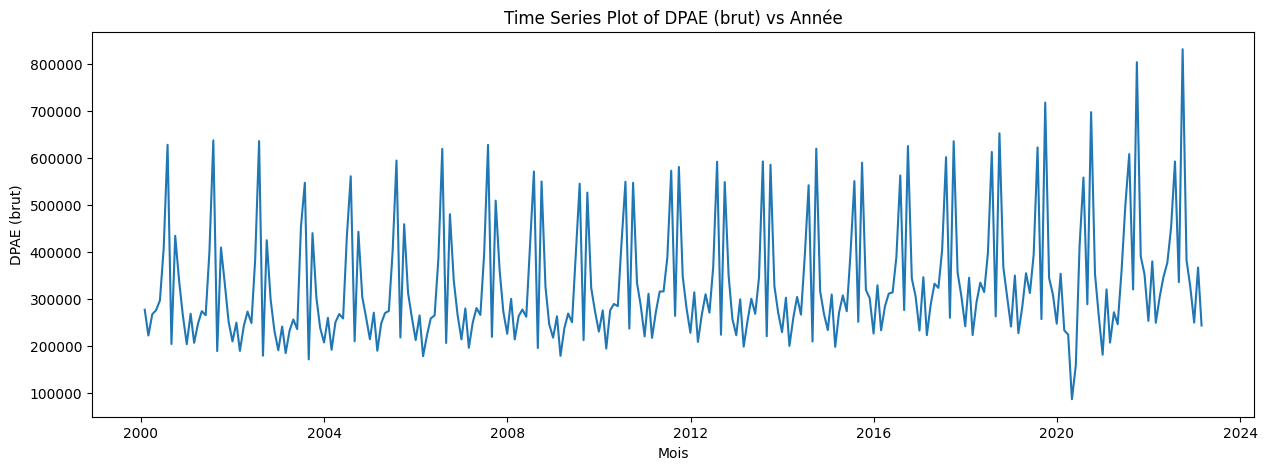

In [ ]:
X = cdd_agg_per_month_each_year['Dernier jour du mois'].to_numpy()
Y = cdd_agg_per_month_each_year['DPAE (brut)'].to_numpy()
plt.plot(X,Y)
plt.xlabel('Mois')
plt.ylabel('DPAE (brut)')
plt.title('Time Series Plot of DPAE (brut) vs Année')
plt.show()

Tendance d'évolution pour les nombres de CDD :
Présence de saisonalité et tendance croissante par saisons : de 2000 à 2004 (puis décroissante due à la bulle d'internet en mars 2000), de 2004 à 2008 (puis décroissante due à la crise), de 2008 au T1 2020 jusqu'au Covid, et puis ça ontinue de croître.

### Etudes statistiques

In [ ]:
# On utilisera cette fonction plus tard aussi. Elle prend en paramètre un dataframe 'df' et un vecteur 'aggregate_by' contenant les variables avec lesquels on regroupe les données.
def compute_statistics(df, aggregate_by=['Année','Trimestre']):

    return df.groupby(aggregate_by, as_index = False).agg(
                                                Somme_DPAE=("DPAE (brut)",'sum'),
                                                Moyenne_DPAE=("DPAE (brut)",'mean'),
                                                Médianne_DPAE=("DPAE (brut)",'median'),
                                                Variance_DPAE=("DPAE (brut)",'var'),
                                                Ecart_type_DPAE=("DPAE (brut)",'std'),
                                            )

#### Par trimestre

In [ ]:
cdd_mois_annee_stat = CDD[['Année','DPAE (brut)','Dernier jour du mois','Trimestre']]

In [ ]:
cdd_stats_par_timestre_et_annee = compute_statistics(cdd_mois_annee_stat, aggregate_by=['Année','Trimestre'])

In [ ]:
cdd_stats_par_timestre_et_annee.head()

,Année,Trimestre,Somme_DPAE,Moyenne_DPAE,Médianne_DPAE,Variance_DPAE,Ecart_type_DPAE
0,2000,1,766820,255606.666667,267406.0,8.562746e+08,29262.170123
1,2000,2,979631,326543.666667,296683.0,4.964105e+09,70456.405538
2,2000,3,1265912,421970.666667,434132.0,4.490411e+10,211905.890096
3,2000,4,807922,269307.333333,265032.0,4.580360e+09,67678.355368
4,2001,1,723024,241008.000000,247699.0,9.860710e+08,31401.767737


#### Par année

In [ ]:
cdd_annee_stat = CDD[['Année','DPAE (brut)','Dernier jour du mois']]

In [ ]:
cdd_stats_par_annee = compute_statistics(cdd_annee_stat, aggregate_by=['Année'])
cdd_stats_par_annee.head()

,Année,Somme_DPAE,Moyenne_DPAE,Médianne_DPAE,Variance_DPAE,Ecart_type_DPAE
0,2000,3820285,318357.083333,276531.0,1.473169e+10,121374.160101
1,2001,3690437,307536.416667,266957.0,1.571737e+10,125368.925778
2,2002,3550074,295839.500000,249158.5,1.703995e+10,130537.170466
3,2003,3511462,292621.833333,239876.0,1.451197e+10,120465.656975
4,2004,3654537,304544.750000,260515.0,1.283155e+10,113276.416871


## **CDI**

###Série temporelle

In [ ]:
df_cdi_mois_annee_dpae = CDI[['Année', 'DPAE (brut)', 'Dernier jour du mois']]
cdi_agg_per_month_each_year = df_cdi_mois_annee_dpae.groupby('Dernier jour du mois', as_index=False).agg('sum')

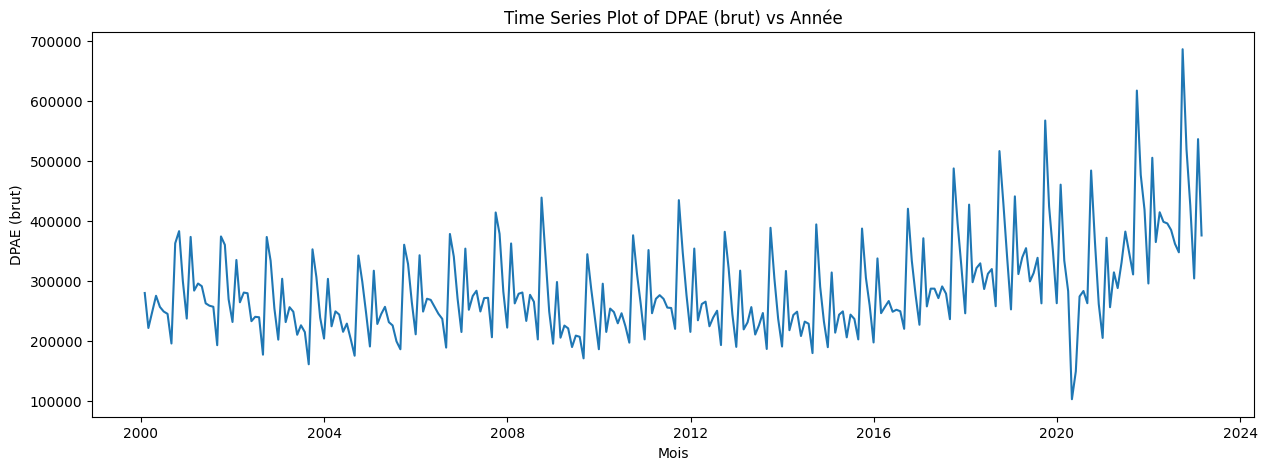

In [ ]:
X = cdi_agg_per_month_each_year['Dernier jour du mois'].to_numpy()
Y = cdi_agg_per_month_each_year['DPAE (brut)'].to_numpy()

plt.plot(X,Y)
plt.xlabel('Mois')
plt.ylabel('DPAE (brut)')
plt.title('Time Series Plot of DPAE (brut) vs Année')
plt.show()

Tendance d'évolution pour les nombres de CDI :
Présence de saisonalité et tendance croissante par saisons : de 2000 à 2004 (puis décroissante due à la bulle d'internet en mars 2000), de 2004 à 2008 (puis décroissante due à la crise), de 2008 au T1 2020 jusqu'au Covid, et puis ça ontinue de croître.

### Etudes statistiques

#### Par trimestre

In [ ]:
cdi_mois_annee_stat = CDI[['Année','DPAE (brut)','Dernier jour du mois','Trimestre']]

In [ ]:
cdi_stats_par_timestre_et_annee = compute_statistics(cdi_mois_annee_stat, aggregate_by=['Année', 'Trimestre'])
cdi_stats_par_timestre_et_annee.head()

,Année,Trimestre,Somme_DPAE,Moyenne_DPAE,Médianne_DPAE,Variance_DPAE,Ecart_type_DPAE
0,2000,1,748294,249431.333333,248032.0,8.509579e+08,29171.182978
1,2000,2,779147,259715.666667,256064.0,1.813884e+08,13468.050131
2,2000,3,801731,267243.666667,244460.0,7.367668e+09,85835.123535
3,2000,4,917974,305991.333333,298927.0,5.348850e+09,73135.833381
4,2001,1,951153,317051.000000,295079.0,2.365176e+09,48633.076440


#### Par année

In [ ]:
cdi_annee_stat = CDI[['Année','DPAE (brut)','Dernier jour du mois']]

In [ ]:
cdi_stats_par_annee = compute_statistics(cdi_annee_stat, aggregate_by=['Année'])
cdi_stats_par_annee.head()

,Année,Somme_DPAE,Moyenne_DPAE,Médianne_DPAE,Variance_DPAE,Ecart_type_DPAE
0,2000,3247146,270595.500000,252257.0,2.998992e+09,54763.049320
1,2001,3443432,286952.666667,276036.0,3.186288e+09,56447.216373
2,2002,3204901,267075.083333,258742.0,3.251370e+09,57020.789621
3,2003,2946740,245561.666667,234575.5,2.759917e+09,52534.915535
4,2004,2915526,242960.500000,235830.5,2.449340e+09,49490.806106


## **Nettoyage des données EESSA**

In [ ]:
df_eessa = pd.read_excel('famille_EMPLOI-SALARIE-TRIM-NATIONAL_09032023.xlsx', header = 0, index_col = 0)

In [ ]:
df_eessa.columns

Index(['idBank', 'Dernière mise à jour', 'Période', '1970-T4', '1971-T1',
       '1971-T2', '1971-T3', '1971-T4', '1972-T1', '1972-T2',
       ...
       '2020-T3', '2020-T4', '2021-T1', '2021-T2', '2021-T3', '2021-T4',
       '2022-T1', '2022-T2', '2022-T3', '2022-T4'],
      dtype='object', length=212)

In [ ]:
df_eessa.head()

,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,...,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4,2022-T1,2022-T2,2022-T3,2022-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",1577239,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",1577235,09/03/2023 07:30,NaN,5440.3,5459.1,5487.7,5522.1,5526.9,5536,5556.9,...,3164.3,3156.8,3167.2,3175.2,3187.6,3198.2,3203.8,3214.1,3228.2,3235.8
Emplois salariés trimestriels - Construction - Section F - CVS,1577236,09/03/2023 07:30,NaN,1807.9,1807.2,1811.8,1815.7,1808.8,1804.8,1804.8,...,1516.3,1530.4,1551.1,1560.5,1574.3,1581.4,1585.6,1587.9,1591.6,1592.4
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",1577237,09/03/2023 07:30,NaN,5320,5312,5346.7,5399.6,5453.9,5509.1,5535.5,...,12465.2,12386.5,12511.7,12771.4,12949.8,13113.7,13197.4,13280.2,13349.9,13375.9
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",1577241,09/03/2023 07:30,NaN,294.7,294.9,295.4,295.7,295.8,296.1,296,...,388.2,388.7,391.1,392.7,394.3,394.6,395.1,397,399.5,401.3


In [ ]:
# Remplacer les valeurs manquantes de chanque colonne en utilisant la propriété DataFrame.loc[].

columns = df_eessa.columns
for column in columns :
  df_eessa.loc[df_eessa[column] == '(O)', column] = np.nan

In [ ]:
df_eessa.head()

,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,...,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4,2022-T1,2022-T2,2022-T3,2022-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",1577239.0,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",1577235.0,09/03/2023 07:30,NaN,5440.3,5459.1,5487.7,5522.1,5526.9,5536,5556.9,...,3164.3,3156.8,3167.2,3175.2,3187.6,3198.2,3203.8,3214.1,3228.2,3235.8
Emplois salariés trimestriels - Construction - Section F - CVS,1577236.0,09/03/2023 07:30,NaN,1807.9,1807.2,1811.8,1815.7,1808.8,1804.8,1804.8,...,1516.3,1530.4,1551.1,1560.5,1574.3,1581.4,1585.6,1587.9,1591.6,1592.4
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",1577237.0,09/03/2023 07:30,NaN,5320,5312,5346.7,5399.6,5453.9,5509.1,5535.5,...,12465.2,12386.5,12511.7,12771.4,12949.8,13113.7,13197.4,13280.2,13349.9,13375.9
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",1577241.0,09/03/2023 07:30,NaN,294.7,294.9,295.4,295.7,295.8,296.1,296,...,388.2,388.7,391.1,392.7,394.3,394.6,395.1,397,399.5,401.3


In [ ]:
df_eessa.isna().sum()

idBank                   0
Dernière mise à jour     0
Période                 80
1970-T4                 52
1971-T1                 52
                        ..
2021-T4                  1
2022-T1                  1
2022-T2                  1
2022-T3                  1
2022-T4                  1
Length: 212, dtype: int64

In [ ]:
df_eessa_t = df_eessa.transpose()

In [ ]:
df_eessa_t.head()

Libellé,"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée","Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS","Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS","Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS",Emplois salariés trimestriels - Cokéfaction et raffinage - A17 : C2 - CVS,"Emplois salariés trimestriels - Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines - A17 : C3 - CVS",Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS,Emplois salariés trimestriels - Fabrication d'autres produits industriels - A17 : C5 - CVS,...,Emplois salariés trimestriels - Industrie manufacturière - Section C - CVS,"Emplois salariés trimestriels - Industrie - Établissements privés - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Établissements privés - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand hors intérim - Sections G, H, I, J, K, L, M, N, R, S, T, hors intérim - CVS","Emplois salariés trimestriels - Tertiaire marchand - Établissements privés - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",Emplois salariés trimestriels - Tertiaire non marchand - Établissements privés - Sections O et Q - CVS,Emplois salariés trimestriels - Ensemble des salariés - Toutes les sections (hors activités extra-territoriales) - CVS,"Emplois salariés trimestriels - Ensemble des salariés, public - Toutes les sections (hors activités extra-territoriales), public - CVS","Emplois salariés trimestriels - Ensemble des salariés, privé - Toutes les sections (hors activités extra-territoriales) - CVS",Emplois salariés trimestriels - Tertiaire non marchand - Sections O et Q - CVS
idBank,1577239.0,1577235.0,1577236.0,1577237.0,1577241.0,1577242.0,1577243.0,1577244.0,1577245.0,1577246.0,...,1796846.0,1796847.0,1796848.0,1796849.0,1796850.0,1796851.0,1796852.0,1796853.0,1796854.0,1796855.0
Dernière mise à jour,12/05/2017 00:00,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,...,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30
Période,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-T4,12409.6,5440.3,1807.9,5320,294.7,514.1,36.3,758.3,599.7,3237.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-T1,12418.8,5459.1,1807.2,5312,294.9,515.1,35.8,760.3,607.8,3245.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_eessa_t.head()

Libellé,"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée","Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS","Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS","Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS",Emplois salariés trimestriels - Cokéfaction et raffinage - A17 : C2 - CVS,"Emplois salariés trimestriels - Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines - A17 : C3 - CVS",Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS,Emplois salariés trimestriels - Fabrication d'autres produits industriels - A17 : C5 - CVS,...,Emplois salariés trimestriels - Industrie manufacturière - Section C - CVS,"Emplois salariés trimestriels - Industrie - Établissements privés - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Établissements privés - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand hors intérim - Sections G, H, I, J, K, L, M, N, R, S, T, hors intérim - CVS","Emplois salariés trimestriels - Tertiaire marchand - Établissements privés - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",Emplois salariés trimestriels - Tertiaire non marchand - Établissements privés - Sections O et Q - CVS,Emplois salariés trimestriels - Ensemble des salariés - Toutes les sections (hors activités extra-territoriales) - CVS,"Emplois salariés trimestriels - Ensemble des salariés, public - Toutes les sections (hors activités extra-territoriales), public - CVS","Emplois salariés trimestriels - Ensemble des salariés, privé - Toutes les sections (hors activités extra-territoriales) - CVS",Emplois salariés trimestriels - Tertiaire non marchand - Sections O et Q - CVS
idBank,1577239.0,1577235.0,1577236.0,1577237.0,1577241.0,1577242.0,1577243.0,1577244.0,1577245.0,1577246.0,...,1796846.0,1796847.0,1796848.0,1796849.0,1796850.0,1796851.0,1796852.0,1796853.0,1796854.0,1796855.0
Dernière mise à jour,12/05/2017 00:00,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,...,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30,09/03/2023 07:30
Période,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-T4,12409.6,5440.3,1807.9,5320,294.7,514.1,36.3,758.3,599.7,3237.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-T1,12418.8,5459.1,1807.2,5312,294.9,515.1,35.8,760.3,607.8,3245.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.rcParams["figure.figsize"] = (18,6)

## **Somme de l’ensemble de secteurs**

In [ ]:
data_eessa = df_eessa_t.iloc[3:]
data_eessa['Somme des secteurs'] = data_eessa.sum(axis=1)
# data_eessa['Periode'] = data_eessa.index
data_eessa_somme_all_secteurs = data_eessa[['Somme des secteurs']]
data_eessa_somme_all_secteurs.head()

Libellé,Somme des secteurs
1970-T4,44241.5
1971-T1,44276.6
1971-T2,44521.4
1971-T3,44845.0
1971-T4,45023.7


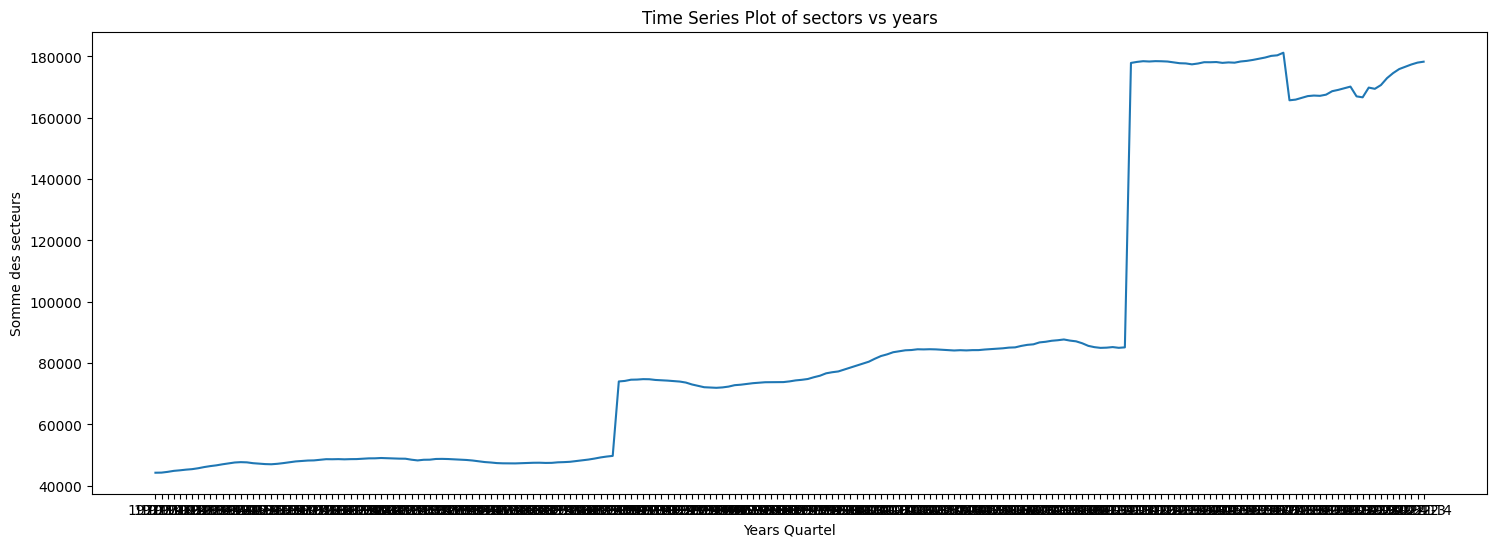

In [ ]:
X = data_eessa_somme_all_secteurs.index
Y = data_eessa_somme_all_secteurs['Somme des secteurs'].to_numpy()
plt.plot(X,Y)
plt.xlabel('Years Quartel')
plt.ylabel('Somme des secteurs')
plt.title('Time Series Plot of sectors vs years')
plt.show()

## **Séries temporels de 2 secteurs**

In [ ]:
secteurs = df_eessa_t.columns[:2]
n_plots = 2
n_columns = 1
print(secteurs)

Index(['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée', 'Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'], dtype='object', name='Libellé')


In [ ]:
def plot_serie_temporel_par_secteur(df, secteur):
  X = df.index
  Y = df[secteur].to_numpy()
  titre_plot = 'Time Serie - Trimestre VS ' + secteur
  plt.plot(X,Y)
  plt.xlabel('Trimestre')
  plt.ylabel(secteur)
  plt.title(titre_plot)
  plt.show()

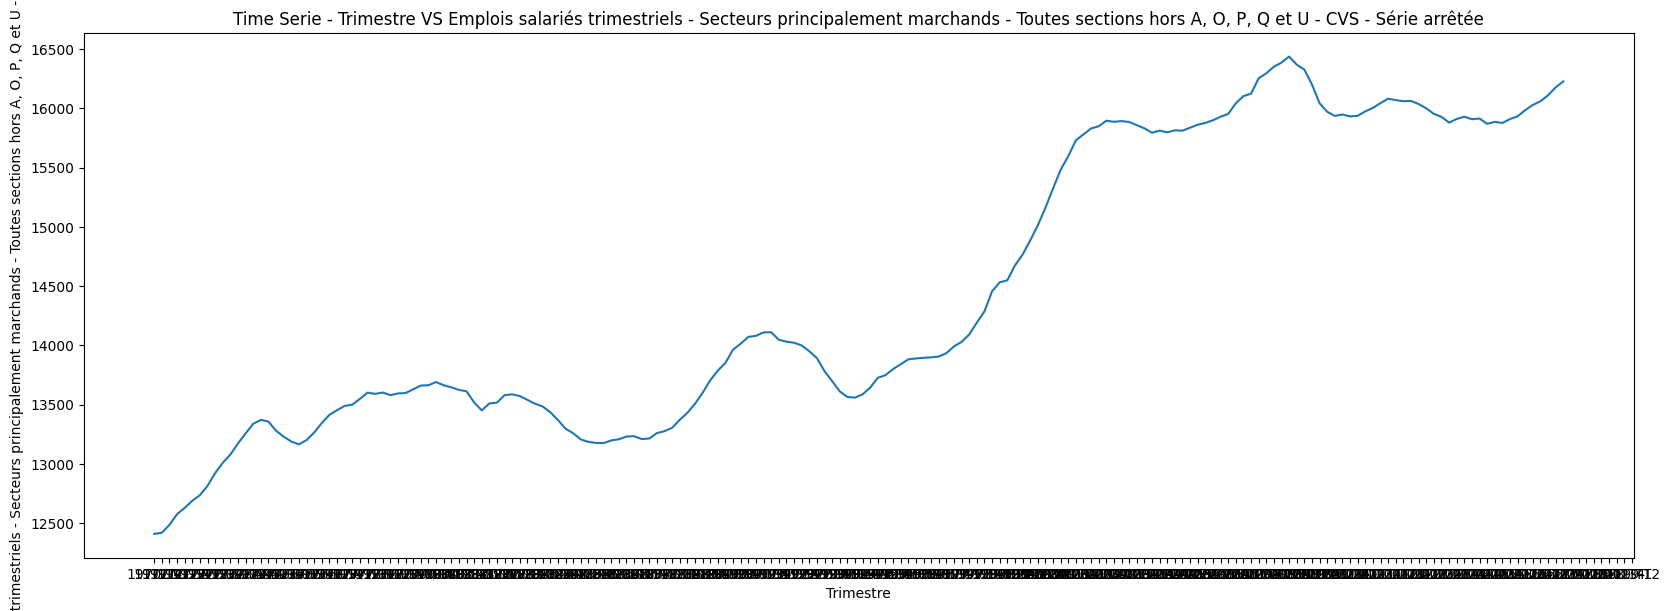

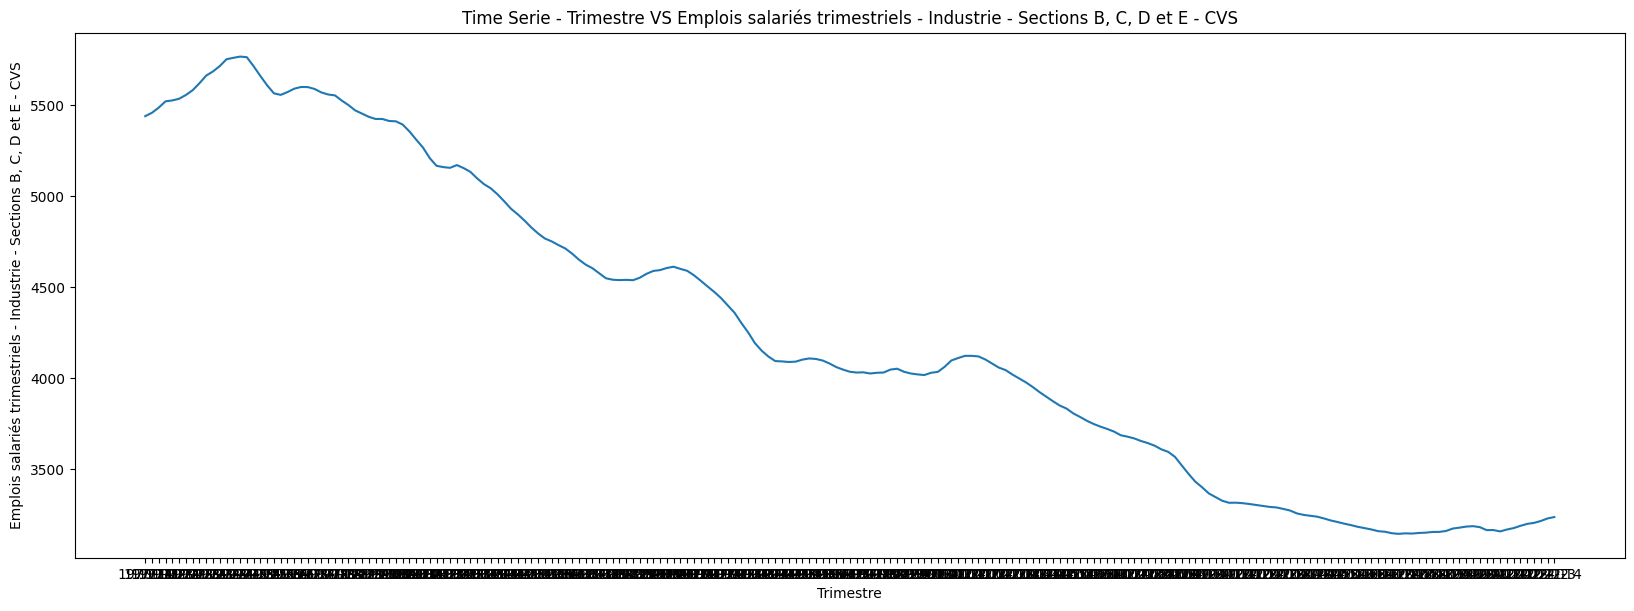

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)

for i in range(1,len(secteurs)+1):
  plt.subplot(n_plots, n_columns, i)
  plot_serie_temporel_par_secteur(data_eessa, secteurs[i-1])

Evolution des secteurs :  

1.   Secteur 1 : tendance à la hausse
2.   Secteur 2 : tendance à la baisse




##Statistiques EESSA

In [ ]:
def stat_data_eessa(data_eessa, secteurs):
  # on utilise un dictionnaire pour stocker toutes les statistiques qui a la structure suivante :
  # { nom_secteur :
  #                {'mean': ..., 'median': ... ,'variance': ..., 'standard deviation': ...}
  # }
  stats_dict = {}
  for i in range(0,len(secteurs)):
      stats_secteur_dict = {}
      stats_secteur_dict['mean'] = data_eessa[secteurs[i]].mean()
      stats_secteur_dict['median'] = data_eessa[secteurs[i]].median()
      stats_secteur_dict['variance'] = data_eessa[secteurs[i]].var()
      stats_secteur_dict['standard deviation'] = data_eessa[secteurs[i]].std()

      stats_dict[secteurs[i]] = stats_secteur_dict

  return stats_dict

In [ ]:
stats_dict = stat_data_eessa(data_eessa, secteurs)

In [ ]:
stats_dict

{'Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée': {'mean': 14459.721505376336,
  'median': 13920.25,
  'variance': 1484588.6134809644,
  'standard deviation': 1218.4369550702918},
 'Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS': {'mean': 4259.1153110047835,
  'median': 4091.7,
  'variance': 727472.3984182923,
  'standard deviation': 852.9199249743743}}

# **Question 2**

## **Saisonnalité CDD**

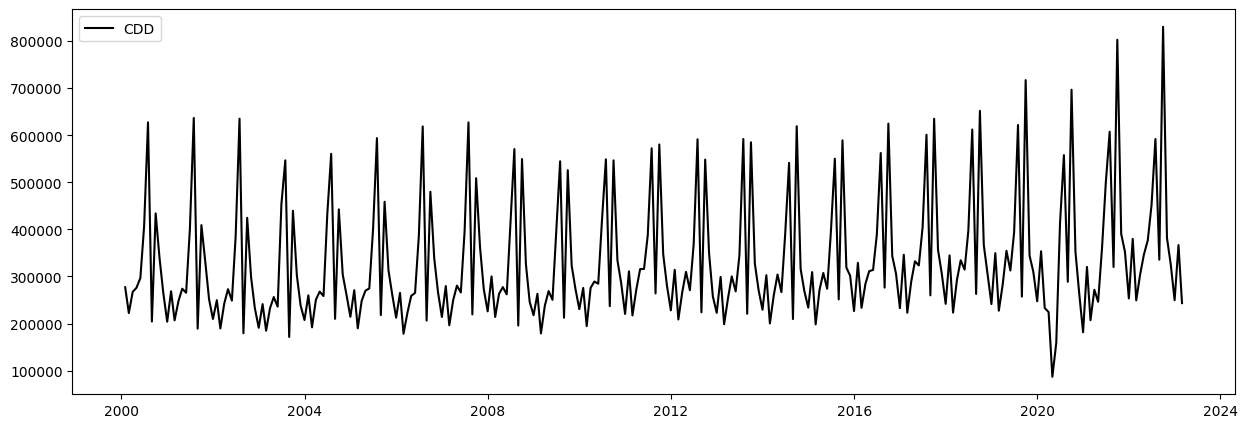

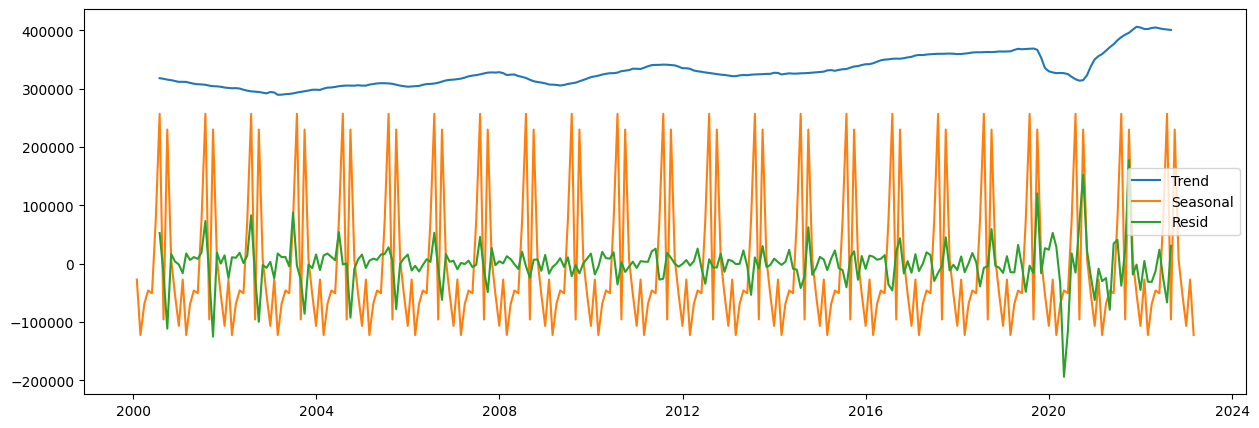

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = (15,5)

data = cdd_agg_per_month_each_year[['DPAE (brut)', 'Dernier jour du mois']]
data = data.set_index('Dernier jour du mois')

decomposition = seasonal_decompose(data['DPAE (brut)'].values, period=12)

X = data.index.to_numpy()
Y = data['DPAE (brut)'].to_numpy()

plt.plot(X, Y, 'k')
plt.legend(['CDD'])
plt.figure()
plt.plot(X, decomposition.trend)
plt.plot(X, decomposition.seasonal)
plt.plot(X, decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])
plt.show()


## **Saisonnalité CDI**

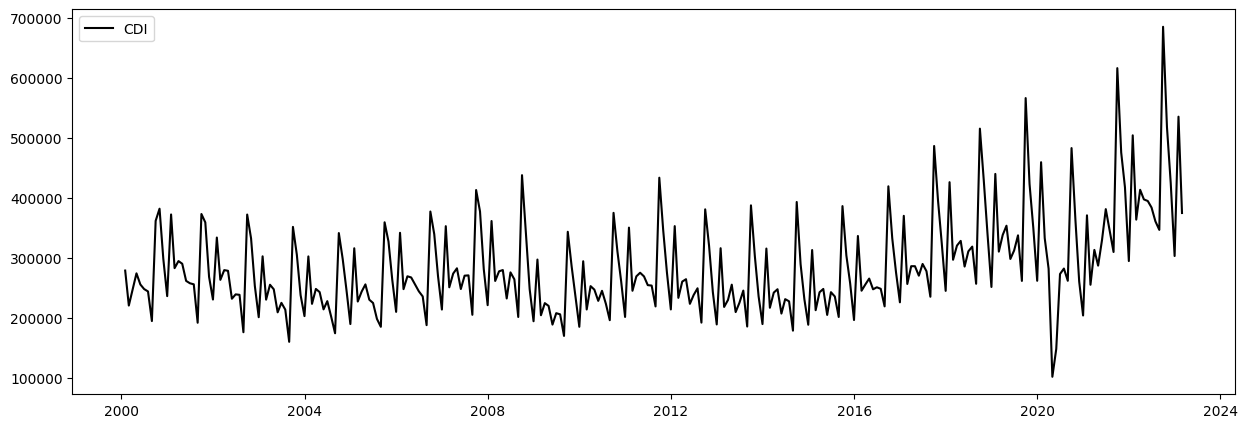

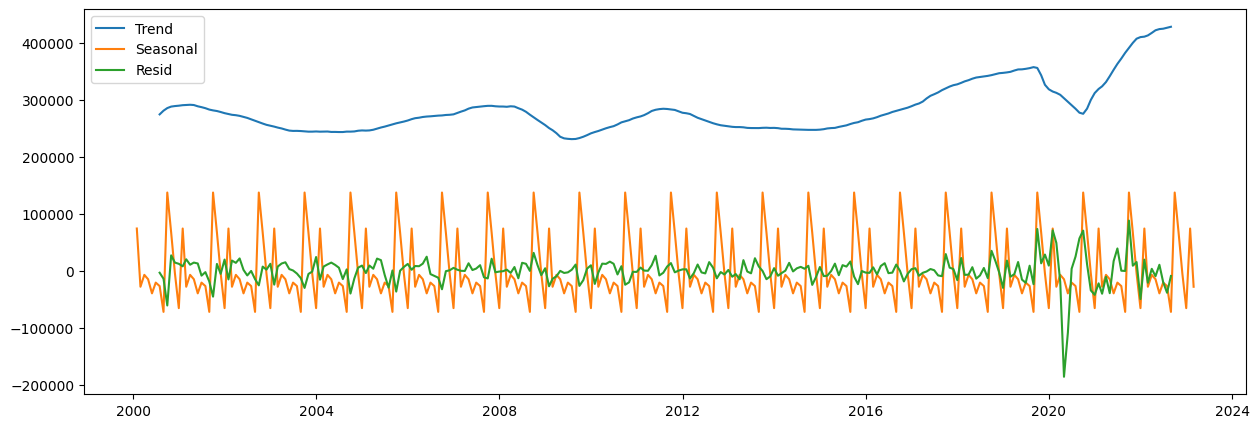

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)

data = cdi_agg_per_month_each_year[['DPAE (brut)', 'Dernier jour du mois']]
data = data.set_index('Dernier jour du mois')

decomposition = seasonal_decompose(data['DPAE (brut)'].values, period=12)

X = data.index.to_numpy()
Y = data['DPAE (brut)'].to_numpy()

plt.plot(X, Y, 'k')
plt.legend(['CDI'])
plt.figure()
plt.plot(X, decomposition.trend)
plt.plot(X, decomposition.seasonal)
plt.plot(X, decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])
plt.show()

## **Saisonnalité secteurs (EESSA dataset)**

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)

def plot_saisonnalite_secteurs(data, secteur):

    decomposition = seasonal_decompose(data[secteur].values, period=12)

    X = data.index.to_numpy()
    Y = data[secteur].to_numpy()

    plt.plot(X, Y, 'k')
    plt.legend(secteur)
    plt.figure()
    plt.plot(X, decomposition.trend)
    plt.plot(X, decomposition.seasonal)
    plt.plot(X, decomposition.resid)
    plt.show()

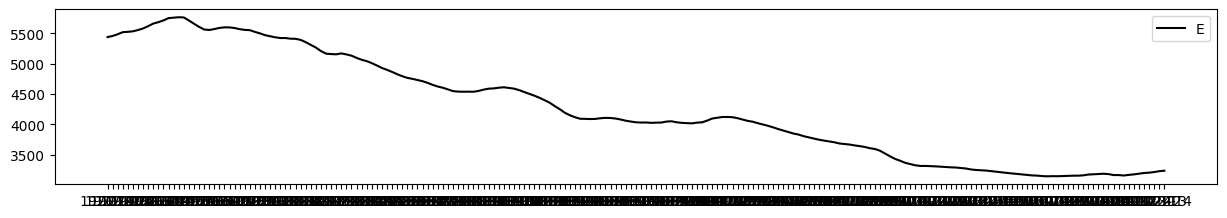

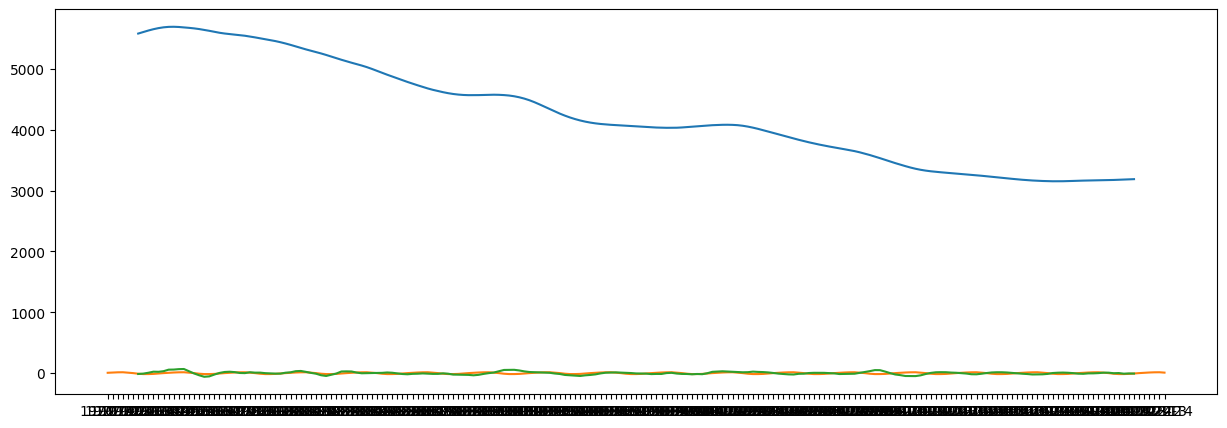

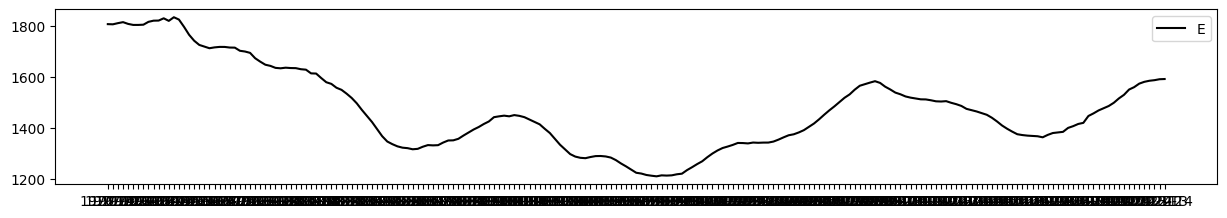

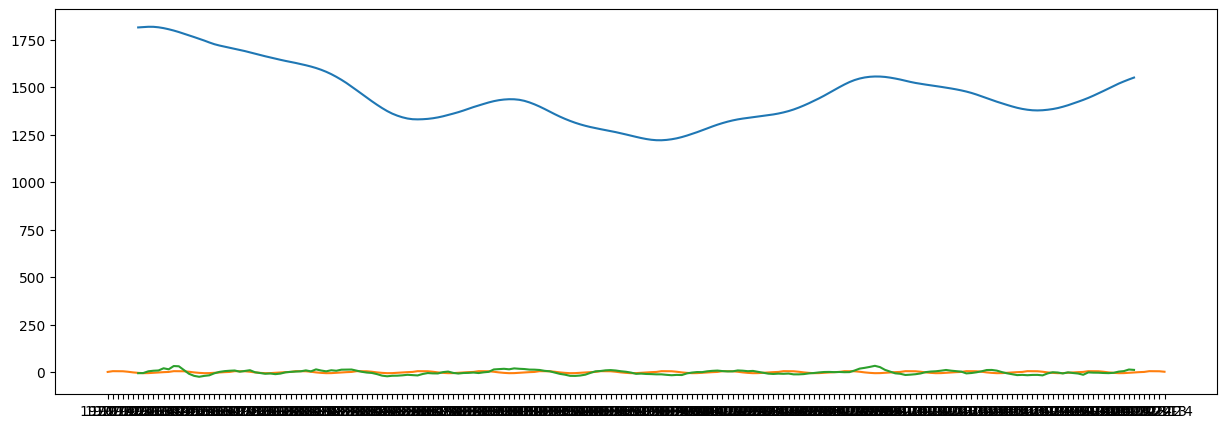

In [ ]:
# dû au fait que le secteur dans la première colonne a des valeurs NaN, on prendre d'autres secteurs
secteurs = df_eessa_t.columns[1:3]

for i in range(1,len(secteurs)+1):
  plt.subplot(n_plots, n_columns, i)
  plot_saisonnalite_secteurs(data_eessa, secteurs[i-1])

## **Corrélation**

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
choix_annee = 2004

data_cdd = CDD[['Année', 'DPAE (brut)', 'Dernier jour du mois','Trimestre']]
data_cdd_annee_choisie_cdd = data_cdd.loc[data_cdd['Année'] == choix_annee]
resultats_annee_choisie_cdd = data_cdd_annee_choisie_cdd.groupby(['Année', 'Trimestre'], as_index = False).agg(Somme=("DPAE (brut)",'sum'))
resultats_annee_choisie_cdd.head()

,Année,Trimestre,Somme
0,2004,1,702313
1,2004,2,959091
2,2004,3,1213395
3,2004,4,779738


In [ ]:
resultats_annee_choisie_cdd['Libellé'] = resultats_annee_choisie_cdd['Année'].astype(str) + '-T' + resultats_annee_choisie_cdd['Trimestre'].astype(str)
resultats_annee_choisie_cdd.head()

,Année,Trimestre,Somme,Libellé
0,2004,1,702313,2004-T1
1,2004,2,959091,2004-T2
2,2004,3,1213395,2004-T3
3,2004,4,779738,2004-T4


In [ ]:
resultats_annee_choisie_cdd_pour_corr = resultats_annee_choisie_cdd[['Libellé', 'Somme']]
resultats_annee_choisie_cdd_pour_corr.set_index('Libellé')
resultats_annee_choisie_cdd_pour_corr.head()

,Libellé,Somme
0,2004-T1,702313
1,2004-T2,959091
2,2004-T3,1213395
3,2004-T4,779738


In [ ]:
index_values = [str(choix_annee)+'-T1', str(choix_annee)+'-T2', str(choix_annee)+'-T3', str(choix_annee)+'-T4']
data_eessa_2004 = data_eessa.loc[index_values]

# print les valeurs que pour les deux secteurs qui nous intéressent
data_eessa_2004[secteurs]

Libellé,"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS
2004-T1,3898.1,1363.4
2004-T2,3872.5,1371.6
2004-T3,3849,1375.4
2004-T4,3832.3,1382.7


In [ ]:
type(data_eessa_2004[secteurs[0]])

pandas.core.series.Series

In [ ]:
data_eessa_2004 = data_eessa.loc[index_values]

data_eessa_annee_choisie_pour_corr_secteur_0 = pd.DataFrame(data_eessa_2004[secteurs[0]])
# on doit reset l'index pour avoir 2 colomnes
data_eessa_annee_choisie_pour_corr_secteur_0 = data_eessa_annee_choisie_pour_corr_secteur_0.reset_index()
data_eessa_annee_choisie_pour_corr_secteur_0.columns = resultats_annee_choisie_cdd_pour_corr.columns
data_eessa_annee_choisie_pour_corr_secteur_0['Somme'] = data_eessa_annee_choisie_pour_corr_secteur_0['Somme'].astype(int)

data_eessa_annee_choisie_pour_corr_secteur_0

,Libellé,Somme
0,2004-T1,3898
1,2004-T2,3872
2,2004-T3,3849
3,2004-T4,3832


In [ ]:
resultats_annee_choisie_cdd_pour_corr

,Libellé,Somme
0,2004-T1,702313
1,2004-T2,959091
2,2004-T3,1213395
3,2004-T4,779738


In [ ]:
resultats_annee_choisie_cdd_pour_corr.Somme

0     702313
1     959091
2    1213395
3     779738
Name: Somme, dtype: int64

In [ ]:
correlation = data_eessa_annee_choisie_pour_corr_secteur_0.corrwith(resultats_annee_choisie_cdd_pour_corr.set_axis( data_eessa_annee_choisie_pour_corr_secteur_0.columns, axis='columns', inplace=False))
print(correlation)

Somme   -0.360542
dtype: float64


# **Question 3**

In [ ]:
from sklearn.model_selection import train_test_split

## **Séparation des données DPAE**

In [ ]:
data_cdd = cdd_agg_per_month_each_year
n_cdd = len(data_cdd)

train_cdd = data_cdd[:200]
test_cdd = data_cdd[200:]

In [ ]:
data_cdi = cdi_agg_per_month_each_year
n_cdi = len(data_cdi)

train_cdi = data_cdi[:200]
test_cdi = data_cdi[200:]

## **Séparation de données EESSA**

In [ ]:
secteur1_train = pd.DataFrame(data_eessa['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'][:150])

In [ ]:
secteur1_test = pd.DataFrame(data_eessa['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'][150:])

In [ ]:
secteur2_train = pd.DataFrame(data_eessa['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'][:150])

In [ ]:
secteur2_test = secteur2 = pd.DataFrame(data_eessa['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'][150:])

## **Prédiction par lissage exponentiel**

### **Simple Exponential Smoothing**

#### **DPAE CDD**

##### Entraînement

In [ ]:
alpha = 0.2
exponential_moving_average = [] #Utilisée pour stocker les valeurs EMA calculées
exponential_moving_average_value = train_cdd['DPAE (brut)'][0] #Initialisation

for value in train_cdd['DPAE (brut)'] :
    exponential_moving_average_value = alpha*value + (1-alpha)*exponential_moving_average_value
    exponential_moving_average.append(exponential_moving_average_value)

train_cdd =train_cdd.assign(Exponential_moving_average= pd.Series(exponential_moving_average, index = train_cdd['Dernier jour du mois']))

In [ ]:
print(train_cdd.index.equals(train_cdd['Exponential_moving_average'].index))
print(train_cdd['DPAE (brut)'].isna().sum())

True
0


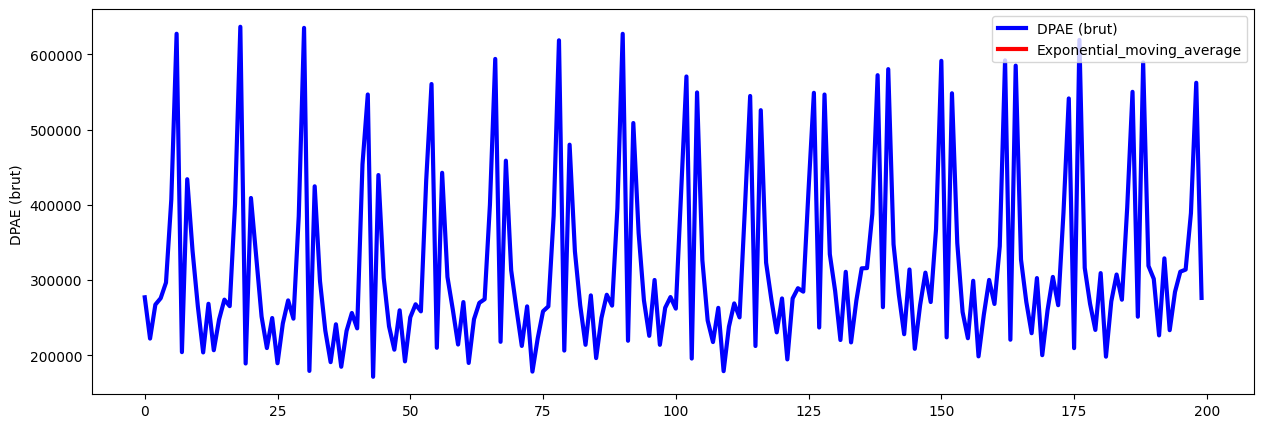

In [ ]:
fig1 = plt.figure(figsize = (15,5))
ax1 = fig1.add_subplot(111, ylabel = 'DPAE (brut) ')
train_cdd['DPAE (brut)'].plot(ax = ax1, color = 'b', lw =  3, legend = True)
train_cdd['Exponential_moving_average'].plot(ax = ax1, color = 'r', lw = 3, legend = True)
plt.show()

##### Prédiction

In [ ]:
exponential_moving_average = []
exponential_moving_average_value = train_cdd['DPAE (brut)'].iloc[-1]

for value in test_cdd['DPAE (brut)']:
    exponential_moving_average_value = alpha*value + (1-alpha)*exponential_moving_average_value
    exponential_moving_average.append(exponential_moving_average_value)

test_cdd = test_cdd.assign(Exponential_moving_average= pd.Series(exponential_moving_average, index = test_cdd['Dernier jour du mois']))


#### **DPAE CDI**

#### Entraînement

In [ ]:
alpha = 0.2
exponential_moving_average = [] #Utilisée pour stocker les valeurs EMA calculées
exponential_moving_average_value = train_cdi['DPAE (brut)'][0] #Initialisation

for value in train_cdi['DPAE (brut)'] :
    exponential_moving_average_value = alpha*value + (1-alpha)*exponential_moving_average_value
    exponential_moving_average.append(exponential_moving_average_value)

train_cdi =train_cdi.assign(Exponential_moving_average= pd.Series(exponential_moving_average, index = train_cdi['Dernier jour du mois']))

In [ ]:
print(train_cdi.index.equals(train_cdi['Exponential_moving_average'].index))
print(train_cdi['DPAE (brut)'].isna().sum())

True
0


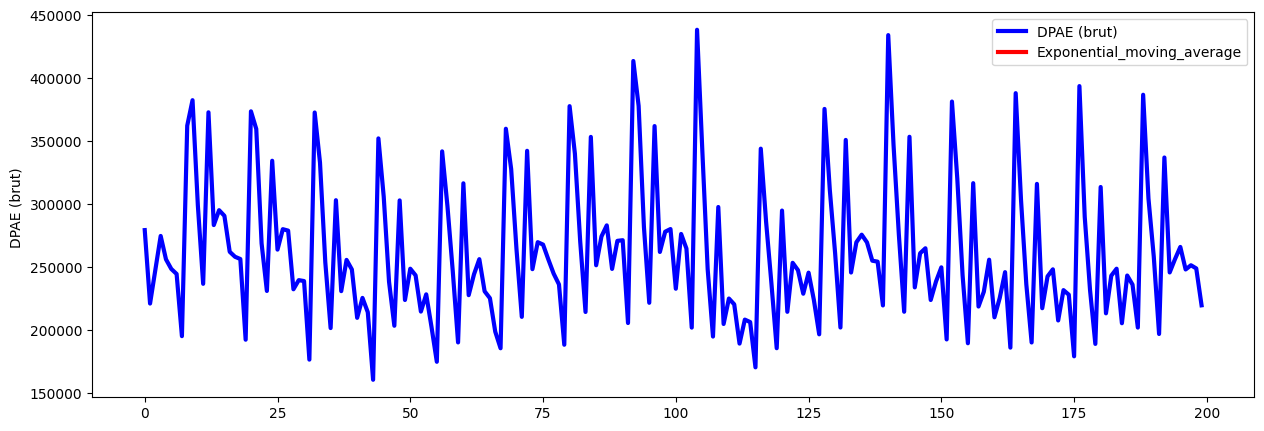

In [ ]:
fig1 = plt.figure(figsize = (15,5))
ax1 = fig1.add_subplot(111, ylabel = 'DPAE (brut) ')
train_cdi['DPAE (brut)'].plot(ax = ax1, color = 'b', lw =  3, legend = True)
train_cdi['Exponential_moving_average'].plot(ax = ax1, color = 'r', lw = 3, legend = True)
plt.show()

#### Prédiction

In [ ]:
exponential_moving_average = []
exponential_moving_average_value = train_cdi['DPAE (brut)'].iloc[-1]

for value in test_cdi['DPAE (brut)']:
    exponential_moving_average_value = alpha*value + (1-alpha)*exponential_moving_average_value
    exponential_moving_average.append(exponential_moving_average_value)

test_cdi = test_cdi.assign(Exponential_moving_average= pd.Series(exponential_moving_average, index = test_cdi['Dernier jour du mois']))


#### **EESSA**

#### Entraînement

In [ ]:
alpha = 0.2
exponential_moving_average = [] #Utilisée pour stocker les valeurs EMA calculées
exponential_moving_average_0value = secteur1_train['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'][0] #Initialisation


Prédiction

# **Question 4**

## **Evaluation de l'erreur de prédicition - CDD**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Calculer MAE, MSE, and RMSE entre les valeurs actuelles et celles qui sont prédites
mae = mean_absolute_error(test_cdd['DPAE (brut)'], test_cdd['Exponential_moving_average'])
mse = mean_squared_error(test_cdd['DPAE (brut)'], test_cdd['Exponential_moving_average'])
rmse = np.sqrt(mse)

## **Evaluation de l'erreur de prédicition - CDI**

In [ ]:
# Calculer MAE, MSE, and RMSE entre les valeurs actuelles et celles qui sont prédites
mae = mean_absolute_error(test_cdi['DPAE (brut)'], test_cdi['Exponential_moving_average'])
mse = mean_squared_error(test_cdi['DPAE (brut)'], test_cdi['Exponential_moving_average'])
rmse = np.sqrt(mse)
